In [ ]:
!pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.9 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics  import accuracy_score,f1_score,precision_score,recall_score
from keras.activations import relu
from keras.utils import to_categorical
import numpy as np
import regex as re
from pyvi import ViTokenizer, ViPosTagger
import string
import tensorflow as tf
import os
from tqdm import tqdm
np.set_printoptions(threshold=np.inf)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Text_Generator

/content/drive/My Drive/Text_Generator


In [ ]:
%ls

data/                Select_Top3_Generate_Text.ipynb  Text_Classifier.ipynb
generate_text.ipynb  Simple_RNN_Text_Generator.ipynb  text_generator.ipynb
model/               temp/


## **Data Pre-Processing**

In [ ]:
def clean_document(doc):
    doc = ViTokenizer.tokenize(doc)
    doc = doc.lower() # lower
    tokens = doc.split() # split into words
    table = str.maketrans('', '', string.punctuation.replace("_", "")) # remove all punctuations
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word]
    return tokens

# print(clean_document('đường phố ở việt nam'))

In [ ]:
TRAIN_PATH = '/content/drive/MyDrive/Text_Generator/data/train'
DIRECTORY_LIST = os.listdir(TRAIN_PATH)
print(DIRECTORY_LIST)

['the_thao', 'doi_song']


In [ ]:
INPUT_LENGTH = 50
sequences = []

for d in DIRECTORY_LIST:
  FILE_LIST = os.listdir(TRAIN_PATH + f'/{d}')
  # print(FILE_LIST)
  for f in tqdm(FILE_LIST):
      f1 = open(file=TRAIN_PATH + f'/{d}' + f'/{f}', encoding='utf-16')
      doc = f1.read()
      tokens = clean_document(doc)
      # for i in range(INPUT_LENGTH + 1, len(tokens)):
      #     seq = tokens[i-INPUT_LENGTH-1:i]
      #     line = ' '.join(seq)
      #     sequences.append(line)
      for i in range(0, len(tokens), 51):
        seq = tokens[i:i+51]
        line = ' '.join(seq)
        sequences.append(line)
  break

100%|██████████| 29/29 [00:27<00:00,  1.04it/s]


In [ ]:
print('Total of senetences: ', len(sequences))
sequences[0:5]

Total of senetences:  203


['tỉ_phú mỹ ra_tay nỗi lo của cđv m u_sắp thành sự_thật khi chủ mới của clb tỉ_phú mỹ m glazer dự_định tăng_giá vé vào sân lên 54 trong vòng 5 năm nhằm tăng doanh_thu của clb từ nay đến năm 2010 lên 246 triệu bảng anh tỉ_phú mỹ cũng dự_định tăng_giá',
 'vé vào sân xem các trận champions_league mùa sau lên 25 đây là tin xấu đối_với các cđv anh có thu_nhập trung_bình ngoài_ra ông chủ mới của m u ra_lệnh đội bóng mỗi năm phải đến quê nhà thành_phố florida để thi_đấu giao_hữu nhằm giúp ông nở mày nở mặt',
 'tan_vỡ vì hình xăm cicarelli vị hôn thê cũ của ronaldo theo nhiều chuyên_gia về chiêm_tinh_học ở brazil cuộc tình giữa ronaldo và d cicarelli tan_vỡ vì hình xăm trên tay siêu_sao bóng_đá clb real madrid trước_đây để tôn_thờ tình_yêu này ro nhà ta đã xăm lên đấy chữ d và',
 'r theo ronaldo giải_thích có_nghĩa “ vĩnh_cữu ” mỗi khi ghi_bàn anh thường để cánh_tay có dòng chữ xăm đó lên trán để ăn_mừng nhưng các nhà chiêm_tinh cho rằng hình xăm đó chỉ mang lại may_mắn nếu nó được xăm sau khi

In [ ]:
# filter several punctuations in 50803 sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~ ')
# create vocabulary (corpus) for each word in 50803 sentences
tokenizer.fit_on_texts(sequences)

print(len(tokenizer.word_index))
tokenizer.word_index

2265


{'của': 1,
 'và': 2,
 'trong': 3,
 'là': 4,
 'với': 5,
 'ở': 6,
 '“': 7,
 '”': 8,
 'đội': 9,
 'đã': 10,
 'được': 11,
 'các': 12,
 'có': 13,
 'khi': 14,
 'không': 15,
 'trận': 16,
 'nhưng': 17,
 'cho': 18,
 'sẽ': 19,
 'vào': 20,
 '1': 21,
 'để': 22,
 'một': 23,
 'phải': 24,
 '2': 25,
 'trọng_tài': 26,
 'đến': 27,
 'người': 28,
 'thắng': 29,
 'cũng': 30,
 '3': 31,
 'anh': 32,
 'ông': 33,
 'này': 34,
 'sau': 35,
 'cầu_thủ': 36,
 'trước': 37,
 'còn': 38,
 'lại': 39,
 'vn': 40,
 'những': 41,
 'họ': 42,
 'đó': 43,
 'vô_địch': 44,
 '4': 45,
 'nhất': 46,
 'hlv': 47,
 '6': 48,
 'tại': 49,
 'nhiều': 50,
 'trên': 51,
 'chỉ': 52,
 'ra': 53,
 'bóng_đá': 54,
 'giải': 55,
 '0': 56,
 'như': 57,
 'từ': 58,
 'vẫn': 59,
 'tôi': 60,
 'năm': 61,
 'giành': 62,
 'vòng': 63,
 'thứ': 64,
 'điểm': 65,
 'bóng': 66,
 'nhà': 67,
 'thi_đấu': 68,
 'nữ': 69,
 'trận_đấu': 70,
 'qua': 71,
 'mới': 72,
 'về': 73,
 'châu': 74,
 'mình': 75,
 'rất': 76,
 'giờ': 77,
 'sân': 78,
 'cần': 79,
 'hơn': 80,
 'làm': 81,
 'chung_kết

In [ ]:
def create_input(text_data):
    input_sequences = []
    for line in text_data:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences

sequences_digit = create_input(sequences)
print(sequences_digit[0:5])
print(len(sequences_digit))

[[527, 136], [527, 136, 1069], [527, 136, 1069, 416], [527, 136, 1069, 416, 417], [527, 136, 1069, 416, 417, 1]]
9516


In [ ]:
max_sequence_len = max([len(seq) for seq in sequences_digit])
input_sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(sequences_digit, maxlen=max_sequence_len, padding='pre'))

In [ ]:
# convert each word to index of corpus
# input_sequences = tokenizer.texts_to_sequences(sequences)

# print(input_sequences[0])
# print(len(input_sequences[0]))

## **Build model**

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

2266

In [ ]:
# separate into input and output
X = input_sequences[:,:-1]
y = input_sequences[:,-1]
# convert y to one-hot vector based on vocab (corpus)
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

In [ ]:
print(len(X[0]))
print(X)

Streaming output truncated to the last 5000 lines.
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   47  693    1  182  238 2102
    14  563    7 2103    8    3   16  124  659  179   43  355  101   22
  2104  887   20 1061    5   89   33  693]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   47  693    1  182  238 2102   14
   563    7 2103    8    3   16  124  659  179   43  355  101   22 2104
   887   20 1061    5   89   33  693   10]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   47  693    1  182  238 2102   14  563
     7 2103    8    3   16  124  659  179   43  355  101   22 2104  887
    20 1061    5   89   33  693   10   29]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0   47  693    1  182  238 2102   14  563    7
  2103    8    3   16  124  

In [ ]:
# print('The length of a one-hot vector y: ', len(y[0]))
# print('The collection of y vectors for all sentences', y)

# Test

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# Define the model
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=50))
model.add(GRU(64, activation='relu', name='gru_layer'))
model.add(Dropout(0.2))
model.add(Dense(vocab_size, activation='softmax', name='output_layer'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


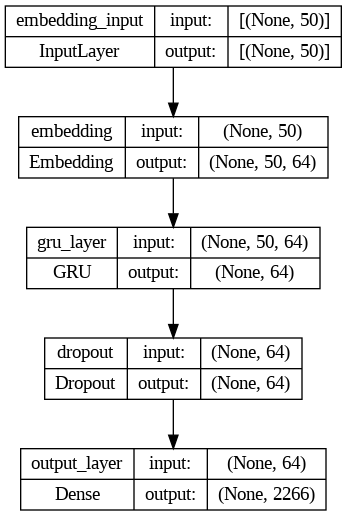

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [ ]:
# Train the model with validation data
model.fit(X, y, batch_size=64, epochs=500, verbose=1, callbacks=[callback])


Epoch 1/500
149/149 [==============================] - 34s 201ms/step - loss: 7.2536 - accuracy: 0.0158
Epoch 2/500
149/149 [==============================] - 22s 150ms/step - loss: 6.8012 - accuracy: 0.0166
Epoch 3/500
149/149 [==============================] - 18s 122ms/step - loss: 6.7483 - accuracy: 0.0162
Epoch 4/500
149/149 [==============================] - 17s 110ms/step - loss: 6.6933 - accuracy: 0.0166
Epoch 5/500
149/149 [==============================] - 20s 135ms/step - loss: 6.6252 - accuracy: 0.0166
Epoch 6/500
149/149 [==============================] - 15s 101ms/step - loss: 6.5565 - accuracy: 0.0177
Epoch 7/500
149/149 [==============================] - 15s 99ms/step - loss: 6.4663 - accuracy: 0.0188
Epoch 8/500
149/149 [==============================] - 16s 105ms/step - loss: 6.3469 - accuracy: 0.0262
Epoch 9/500
149/149 [==============================] - 15s 103ms/step - loss: 6.1982 - accuracy: 0.0336
Epoch 10/500
149/149 [==============================] - 17s 112ms

In [ ]:
# 0.9663

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            145024    
                                                                 
 gru_layer (GRU)             (None, 64)                24960     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 2266)              147290    
                                                                 
Total params: 317274 (1.21 MB)
Trainable params: 317274 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
next_words = 3
seed_text="vn"
y_predict=[]
def Recommend(seed_text):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model.predict(token_list)
        predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
        seed_text += " " + predicted_word
        y_predict.append(predicted_word)
    return seed_text
y_result=Recommend(seed_text)
print(y_result)
print(y_predict)

1/1 [==============================] - 0s 24ms/step
vn yếu yếu ắt
['yếu', 'yếu', 'ắt']


In [ ]:
%cd /content/drive/My Drive/Text_Generator/model

/content/drive/My Drive/Text_Generator/model


In [ ]:
import pickle
model.save('GRU_language_model.h5')

with open('GRU_tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

with open('GRU_sequences_digit.pkl', 'wb') as f:
    pickle.dump(sequences_digit, f)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
